<a href="https://colab.research.google.com/github/KhomZ/The-Pragmatic-Programmer/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [50,50]

train_path = '/content/drive/MyDrive/Colab Notebooks/Project-major/Licenseplate_recognization-master/images_train'
# valid_path = '/content/drive/MyDrive/Colab Notebooks/Project-major/Licenseplate_recognization-master/images_test'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Project-major/Licenseplate_recognization-master/test_data'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Project-major/Licenseplate_recognization-master/images_train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 56, 56, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 25, 25, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project-major/Licenseplate_recognization-master/images_train',
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2033 images belonging to 12 classes.


In [ ]:
training_set.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'BA': 10,
 'PA': 11}

In [ ]:
# test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project-major/Licenseplate_recognization-master/images_test',
#                                             target_size = (50, 50),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project-major/Licenseplate_recognization-master/test_data',
                                            target_size = (50, 50),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 413 images belonging to 12 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute

# r = model.fit_generator(
#   training_set,
#   validation_data=test_set,
#   epochs=10,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )

r = model.fit(training_set,
                    epochs = 50,
                    steps_per_epoch=len(training_set),
                    validation_data = test_set,
                    validation_steps=len(test_set)
                    )

Epoch 1/50
64/64 [==============================] - 537s 8s/step - loss: 2.4639 - accuracy: 0.1220 - val_loss: 2.4056 - val_accuracy: 0.1332
Epoch 2/50
64/64 [==============================] - 37s 586ms/step - loss: 2.3651 - accuracy: 0.1771 - val_loss: 2.3159 - val_accuracy: 0.2373
Epoch 3/50
64/64 [==============================] - 38s 589ms/step - loss: 2.2934 - accuracy: 0.2130 - val_loss: 2.2522 - val_accuracy: 0.2131
Epoch 4/50
64/64 [==============================] - 37s 584ms/step - loss: 2.2263 - accuracy: 0.2528 - val_loss: 2.2404 - val_accuracy: 0.2228
Epoch 5/50
64/64 [==============================] - 38s 587ms/step - loss: 2.1821 - accuracy: 0.2700 - val_loss: 2.1647 - val_accuracy: 0.2663
Epoch 6/50
64/64 [==============================] - 38s 589ms/step - loss: 2.1270 - accuracy: 0.3148 - val_loss: 2.1122 - val_accuracy: 0.3293
Epoch 7/50
64/64 [==============================] - 38s 588ms/step - loss: 2.0806 - accuracy: 0.3379 - val_loss: 2.1104 - val_accuracy: 0.3390
E

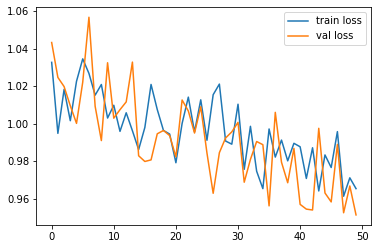

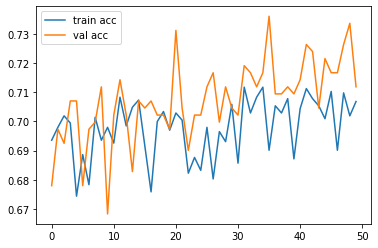

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[8.1125362e-04, 1.4273229e-02, 6.3322648e-02, ..., 2.0527707e-02,
        3.1962928e-03, 2.1329811e-02],
       [4.1030195e-02, 1.1504804e-02, 2.9306877e-01, ..., 1.2770972e-01,
        2.7843982e-03, 3.8104642e-02],
       [4.0651078e-04, 1.2868705e-03, 4.3812092e-02, ..., 1.6440110e-02,
        7.3388376e-04, 1.2209265e-04],
       ...,
       [4.3863696e-03, 1.9313877e-02, 4.5765946e-03, ..., 3.3575390e-02,
        6.9925329e-04, 3.6519144e-02],
       [1.6842911e-02, 5.4817222e-02, 1.3993391e-02, ..., 2.3633596e-02,
        7.0228286e-02, 2.6172414e-01],
       [3.1901938e-03, 1.8292055e-02, 1.3263727e-02, ..., 2.0285521e-02,
        3.2553107e-01, 1.6148910e-02]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([ 4,  2,  6,  3,  3, 11,  4,  8,  2, 10,  9,  3,  9,  2,  9,  9,  2,
        1,  1, 11, 11,  5,  3,  2,  3,  2,  3,  9,  9, 10,  2, 11,  7, 10,
        2,  8,  5, 10, 11, 11, 10, 10,  9, 10,  5,  5,  3,  2,  3,  3, 10,
        1,  5,  7,  2,  8,  3,  0, 11,  1,  6,  7, 10, 11, 10,  2,  5,  0,
        7,  3, 11,  7,  2, 10,  1,  9, 10,  7, 11, 10, 11, 10,  3,  3,  0,
        3,  6, 10,  3,  5,  0,  4,  0,  3,  7,  2,  5, 10,  5,  3, 11,  4,
       10,  5,  1,  0,  0,  6, 10,  4, 10,  1, 10,  1,  3, 10,  2, 11,  5,
        7,  3,  3,  7,  3,  5,  9,  3,  5,  2,  8,  1,  5,  2,  4, 11,  3,
        2,  8, 10, 10,  3,  7,  1,  3,  3,  4,  3, 11, 10,  1,  1,  3,  9,
       11,  9,  0,  0, 10,  1,  0,  5,  1,  7,  6,  7,  1,  4,  8, 11, 11,
       10, 10,  1,  9,  2,  3,  5, 10,  1, 11,  7,  4,  6,  9,  9,  3, 11,
        8, 10,  2,  4,  9,  3,  1, 10, 10,  3, 11, 11, 10,  1,  1,  4,  2,
        8, 11,  8,  2,  6,  8,  9,  1,  3,  5,  5,  5, 10,  3,  7,  1,  0,
       11,  7, 11,  4,  2

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('model_resnet50.h5')

In [ ]:
# img_data

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Project-major/Licenseplate_recognization-master/test1.jpg')

In [ ]:
x = image.img_to_array(img)
x

array([[[242., 226., 237.],
        [242., 226., 237.],
        [242., 226., 239.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[242., 226., 237.],
        [242., 226., 237.],
        [242., 226., 239.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[243., 227., 238.],
        [243., 227., 238.],
        [242., 226., 239.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[ 97.,  86.,  84.],
        [102.,  91.,  89.],
        [112., 101.,  99.],
        ...,
        [139., 149., 140.],
        [140., 150., 141.],
        [147., 157., 148.]],

       [[118., 107., 105.],
        [112., 101.,  99.],
        [108.,  97.,  95.],
        ...,
        [137., 147., 138.],
        [132., 142., 133.],
        [134., 144., 135.]],

       [[127., 116., 114.],
        [122., 111., 109.],
        [ 99.,  

In [ ]:
x.shape
# kina yeti dherai large number ko shape aayo why?????????

(4000, 3000, 3)

In [ ]:
x = x/

In [ ]:
# khom